In [2]:
import numpy as np

from IPython.display import Image, clear_output, display

# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
%matplotlib inline


# Determining Big-O for an algorithm

+ It's almost always some combination of a polynomial $N^{\alpha}$ and $Log(N)$. Remember that overwriting values, peeking the front of a queue, etc take constant time or $\mathcal{O}(1)$


### Some useful times to know
+ $Log(N)$ usually means you can do something clever (recursion, bisection search, etc)
+ Exp(N) is rare and usually not optimal (describes a process that branches)
+ Stirling's approximation: $N! \sim \sqrt{N} e^{-N} N^N$ or $Log(N!) \sim N Log N$
+ Sorting a list via mergesort is $\mathcal{O}(N Log(N))$ 
+ Binary search, two-sum are pointers with LogN time
+ Dot product of two length-$N$ vectors is $\mathcal{O}(N)$. $N \times N$ matrix-vector product is $\mathcal{O}(N^2)$. Product of two $N \times N$ matrices is $\mathcal{O}(N^3)$

## Binary search

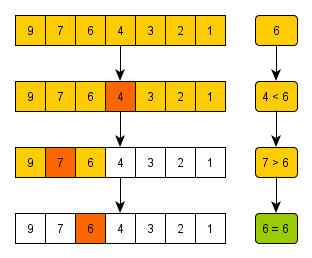

In [3]:
Image("../resources/binsearch.png", width=500)
# Source: https://stackoverflow.com/questions/38684111/worst-case-time-complexity-to-search-an-element-in-a-closely-sorted-array-of-ele

In [4]:
def binary_search(a, target):
    """
    Find the index of the first element in a *sorted* array that is greater than or equal to target.

    We are using a two-pointer approach with binary search
    """
    lo = 0
    hi = len(a)
    while lo < hi:
        mid = (lo + hi) // 2
        if a[mid] < target:
            lo = mid + 1
        else:
            hi = mid
    return lo

a = np.array([1, 2, 3, 4, 7, 8, 9, 10, 15, 43, 99])

print(binary_search(a, 5))

4


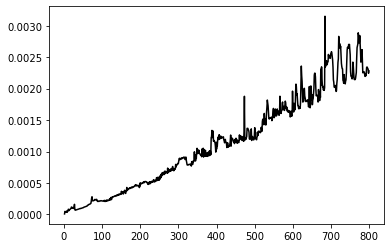

In [6]:
import timeit 
nvals = np.arange(2, 800)
all_times = list()
for n in nvals:
    all_reps = list()
    for rep in range(10):
        all_reps.append(
            timeit.timeit("binary_search(np.arange(n), n // 2)", globals=globals(), number=n)
        )
    all_times.append(np.mean(all_reps))

plt.figure()
plt.plot(nvals, all_times, 'k')

# Recursion and dynamic programming

+ Look for problems where the solution to the size $N$ input can be written in terms of the size $N - 1$, $N - 2$, etc inputs

+ + Factorial: $N! = N (N - 1)!$
+ + Fibonacci: $Fib(N) = Fib(N - 1) + Fib(N - 2)$
+ + Ornstein-Uhlenbeck Process: $x_{t + 1} = \alpha x_t + \epsilon$

<br></br>

### Key ingredients

+ Base cases: $0! = 1$, $x_0 = 1$ (initial conditions), etc
+ Inductive reasoning: write a case for $N$ in terms of $N - 1$, $N - 2$, etc

### Recursion vs Dynamic programming
+ Dynamic programming: start from base cases, and work your way up to $N$
+ Recursion: start from $N$, then do $N - 1$, etc, until you hit a base case

+ Both use a "divide and conquer" approach, but they work in opposite directions
+ When working with graphs or trees, we often encounter recursion due to the need to perform depth-first search
+ When simulating dynamical systems, or processes that don't go backwards, we often run into DP

+ Dynamic programming is typically $\mathcal{O}(N)$ runtime, $\mathcal{O}(1)$ memory. Recursion is ideally $\mathcal{O}(Log(N))$ runtime


## Recursion

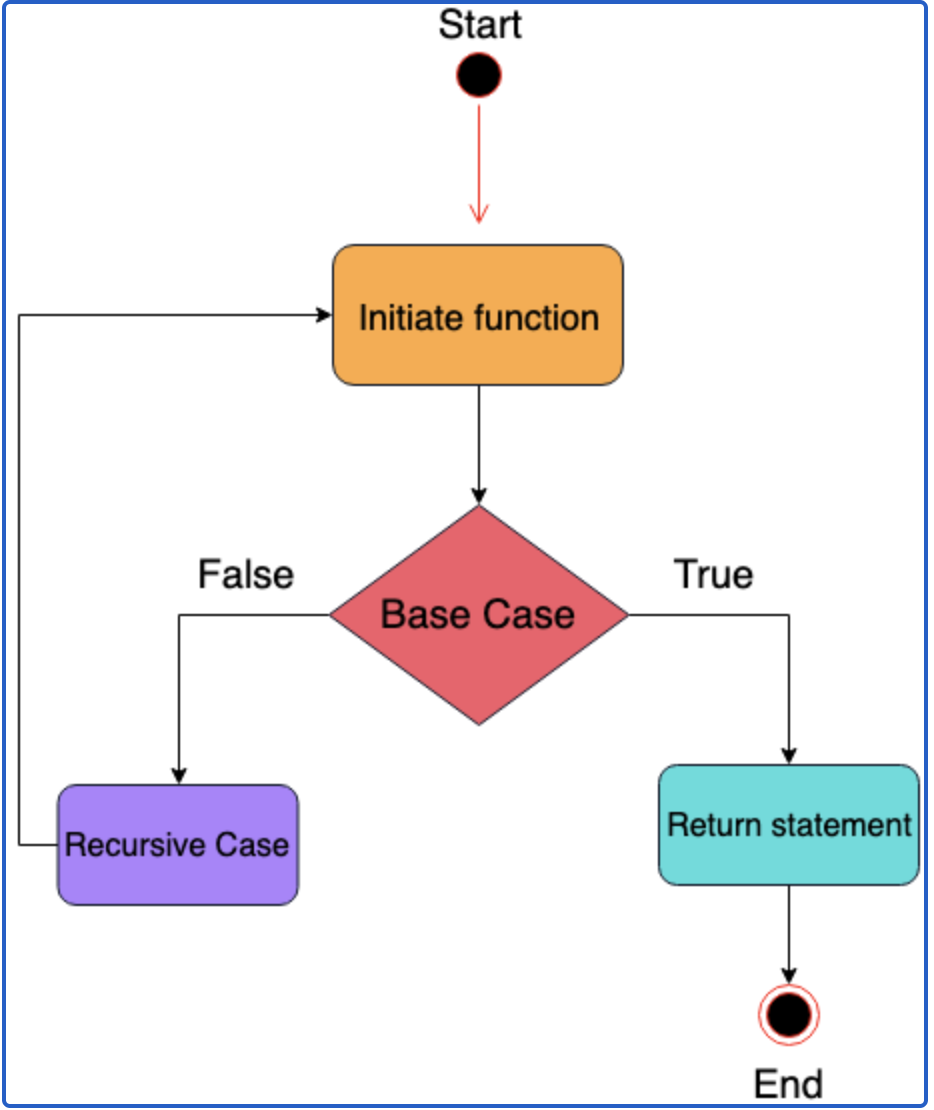

In [3]:
Image("../resources/recursion.png", width=500)
# Source: https://betterprogramming.pub/recursive-functions-2b5ce4610c81

/var/folders/g_/3gcjjjc12l9cjdh8drtctrdm0000gp/T/ipykernel_91953/791701079.py:8: RuntimeWarning: overflow encountered in long_scalars
  return n * factorial(n - 1)


Text(0, 0.5, 'Time (s)')

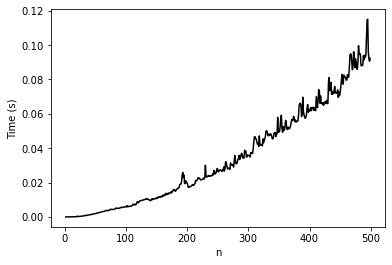

In [4]:
def factorial(n):
    """Compute n factorial via recursion"""
    # Base case
    if n == 0:
        return 1
    # Recursive case
    else:
        return n * factorial(n - 1)



### Run a timing test
import timeit

nvals = np.arange(2, 500)
all_times = list()
for n in nvals:
    all_times.append(
        timeit.timeit("factorial(n)", globals=globals(), number=n)
    )

plt.figure()
plt.plot(nvals, all_times, 'k')
# plt.plot(nvals, 2e-7 * nvals**2)
plt.xlabel("n")
plt.ylabel("Time (s)")

# Why is this not O(N)? It turns out that multiplying large floats has unfavorable 
# scaling with N (Karatsuba multiplication is O(N^1.59), gradeschool is O(N^2) where N is
# the number of digits). 


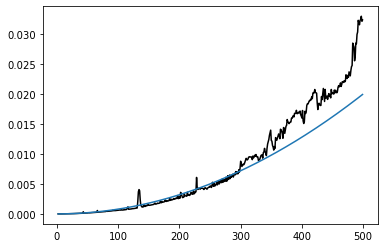

In [5]:
def factorial(n):
    """Compute n factorial, for n >= 0, with dynamic programming."""
    nprev = 1
    # Base case
    if n == 0:
        return nprev
    for i in range(1, n + 1):
        nprev *= i
    return nprev

import timeit

nvals = np.arange(2, 500)
all_times = list()
for n in nvals:
    all_times.append(
        timeit.timeit("factorial(n)", globals=globals(), number=n)
    )

plt.figure()
plt.plot(nvals, all_times, 'k')
plt.plot(nvals, 8e-8 * nvals**2)


Text(0, 0.5, 'Time (s)')

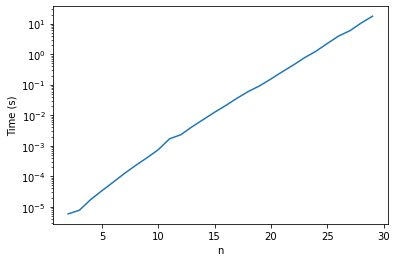

In [6]:
def fibonacci(n):
    """Compute the nth Fibonacci number via recursion"""
    # Base cases
    if n == 0:
        return 0
    elif n == 1:
        return 1

    # Recursive case
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

nvals = np.arange(2, 30)
all_times = list()
for n in nvals:
    all_times.append(
        timeit.timeit("fibonacci(n)", globals=globals(), number=n)
    )
plt.semilogy(nvals, all_times)
plt.xlabel("n")
plt.ylabel("Time (s)")


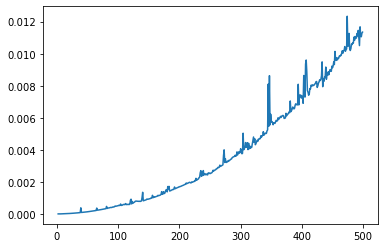

In [7]:
def fibonacci(n):
    """Compute the nth Fibonacci number via dynamic programming."""
    
    if n == 0:
        return 0
    elif n == 1:
        return 1

    n1, n2 = 0, 1
    for i in range(2, n + 1):
        n1, n2 = n2, n1 + n2
    return n2

nvals = np.arange(2, 500)
all_times = list()
for n in nvals:
    all_times.append(
        timeit.timeit("fibonacci(n)", globals=globals(), number=n)
    )
plt.plot(nvals, all_times)


## Depth-first search (solving a maze)

+ Worst case: $\mathcal{O}(N_v + N_e)$, where $N_v$, $N_e$ are the number of vertices and edges, respectively
+ The number of edges of a hypercube: $N_e = d N_v / 2$, where $d$ is the dimension
+ + Implies worst-case $\mathcal{O}(N)$ for dfs in square lattice